## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results,on='Mouse ID')
# Display the data table for preview
combined_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mouse_metadata.count()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df_dups = combined_df.loc[combined_df.duplicated(['Mouse ID','Timepoint'],keep=False)]
df_dups


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
df_dups


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# df[df["name"] != 'tom']
# clean_df = combined_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
clean_df = combined_df[combined_df["Mouse ID"] != "g989"]
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
# MEAN
tumor_vol_mean = clean_df.groupby('Drug Regimen') ['Tumor Volume (mm3)'].mean()
tumor_vol_mean


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [9]:
# MEDIAN
tumor_vol_median = clean_df.groupby('Drug Regimen') ['Tumor Volume (mm3)'].median()
tumor_vol_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [11]:
# VARIANCE
tumor_vol_variance = clean_df.groupby('Drug Regimen') ['Tumor Volume (mm3)'].var()
tumor_vol_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [12]:
# STANDARD DEVIATION
tumor_vol_std = clean_df.groupby('Drug Regimen') ['Tumor Volume (mm3)'].std()
tumor_vol_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [13]:
# STANDARD ERROR OF THE MEAN (SEM)
tumor_vol_sem = clean_df.groupby('Drug Regimen') ['Tumor Volume (mm3)'].sem()
tumor_vol_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [14]:
type(tumor_vol_sem)

pandas.core.series.Series

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

d = {"Mean":tumor_vol_mean,"Median":tumor_vol_median,"Variance":tumor_vol_variance,"Std Dev":tumor_vol_std,\
    "SEM":tumor_vol_sem}
summ_stats_df = pd.DataFrame(d)
summ_stats_df

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Generate a df of "describe()" statistics of the tumor volume for each regimen
# This method produces everything in a single groupby function (not requested for homework, just wanted to see)
tumor_vol_stats = clean_df.groupby('Drug Regimen') ['Tumor Volume (mm3)'].describe().reset_index()
tumor_vol_stats

,Drug Regimen,count,mean,std,min,25%,50%,75%,max
0,Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
1,Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
2,Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
3,Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
4,Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
5,Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
6,Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
7,Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
8,Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690
9,Zoniferol,182.0,53.236507,6.966589,45.000000,47.337876,51.818479,57.954259,73.324432


In [17]:
type(tumor_vol_stats)

pandas.core.frame.DataFrame

## Bar and Pie Charts

In [18]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
num_mice_per_drug = clean_df.groupby('Drug Regimen')['Mouse ID'].nunique().reset_index()
num_mice_per_drug


,Drug Regimen,Mouse ID
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,24
7,Ramicane,25
8,Stelasyn,24
9,Zoniferol,25


In [19]:
type(num_mice_per_drug)

pandas.core.frame.DataFrame

In [20]:
num_mice_per_drug.columns = ['Drug Regimen','Number of Mice']
num_mice_per_drug

,Drug Regimen,Number of Mice
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,24
7,Ramicane,25
8,Stelasyn,24
9,Zoniferol,25


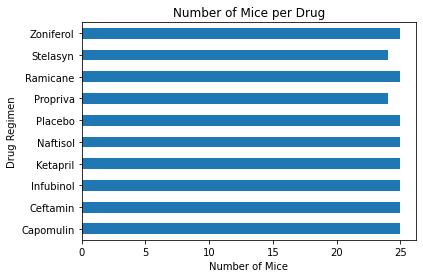

In [21]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plot01 = num_mice_per_drug.plot.barh(x='Drug Regimen',y='Number of Mice',legend=False,title="Number of Mice per Drug")
plot01.set(xlabel = "Number of Mice")
figsize=[6.0,4.8]


In [22]:
# Create an array that contains the number of mice for each drug regimen
list_x = num_mice_per_drug['Number of Mice'].tolist()
list_x

[25, 25, 25, 25, 25, 25, 24, 25, 24, 25]

In [28]:
type(list_x)

list

In [23]:
list_y = num_mice_per_drug['Drug Regimen'].tolist() 
list_y

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

Text(0.5, 1.0, 'Number of Mice per Drug')

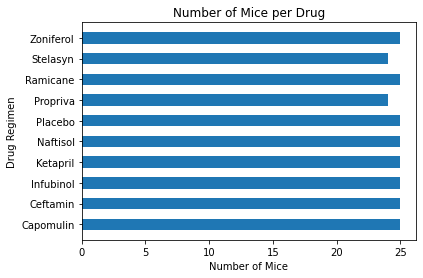

In [25]:
# Tell Matplotlib to make a horizontal bar chart with list_y(drugs) as y-axis and x_axis (number of mice) as x_axis
bar_width = 0.55
plt.barh(list_y,list_x,bar_width)
figsize=[6.0,4.8]
plt.xlabel('Number of Mice')
plt.ylabel('Drug Regimen')
plt.title('Number of Mice per Drug')

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
num_mice_by_sex = clean_df.groupby('Sex')['Mouse ID'].nunique().reset_index()
num_mice_by_sex

,Sex,Mouse ID
0,Female,123
1,Male,125


In [32]:
#num_mice_per_drug.columns = ['Drug Regimen','Number of Mice']
num_mice_by_sex.columns = ['Sex','Number of Mice']
num_mice_by_sex_sex_index = num_mice_by_sex.set_index('Sex',inplace=False)
num_mice_by_sex_sex_index




,Number of Mice
Sex,
Female,123
Male,125


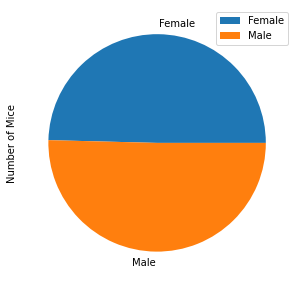

In [33]:
# Plot the chart
plot = num_mice_by_sex_sex_index.plot.pie(figsize=(5,5),subplots=True)

([<matplotlib.patches.Wedge at 0x254487384f0>,
 [Text(0.013934097579311265, 1.0999117423341975, 'Female'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Male')])

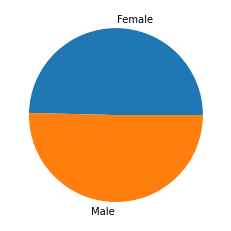

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexes = num_mice_by_sex['Sex']
number = num_mice_by_sex['Number of Mice']
plt.pie(number,labels=sexes)



In [35]:
# Export the clean-df to a .csv file so I can look at it
clean_df.to_csv (r'C:\Users\ssb\Desktop\week05_plots_dataframe.csv', index = False, header=True)


## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoints_thismouse = clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()
timepoints_thismouse
# For each Mouse ID
    # If Drug Regimen == any of Capomulin, Ramicane, Infubinol, Ceftamin
        # Get row num for max Timepoint and get Tumor Volume (mm3) value from that column
        # Put Mouse ID and 


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
lasttp_df = clean_df.merge(timepoints_thismouse,on = ['Mouse ID','Timepoint'])
lasttp_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [37]:
# Put treatments into a list for for loop (and later for plot labels)
druglist = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tum_vols=[]

    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in druglist:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
   
    right_drug = lasttp_df.loc[lasttp_df['Drug Regimen']==drug,'Tumor Volume (mm3)']
    print(drug)
    print(right_drug)
    
    
    # add subset
    tum_vols.append(right_drug)
    tum_vols
    
    
    # Determine outliers using upper and lower bounds
    
    

Capomulin
1      23.343598
2      28.484033
3      28.430964
6      30.485985
10     31.023923
12     31.896238
13     32.377357
14     33.329098
16     34.455298
20     37.311846
22     36.041047
24     37.074024
28     38.846876
30     38.939633
31     38.982878
32     38.753265
34     38.125164
35     39.952347
36     40.658124
37     40.159220
38     40.728578
39     41.483008
40     41.581521
45     47.685963
180    46.539206
Name: Tumor Volume (mm3), dtype: float64
Ramicane
0     22.050126
4     29.128472
5     30.276232
7     30.564625
8     30.638696
9     31.560470
11    31.095335
15    33.397653
17    32.978522
18    33.562402
19    36.134852
21    38.810366
23    37.225650
25    36.374510
26    36.561652
27    37.311236
29    38.342008
33    38.407618
41    40.659006
42    40.667713
43    45.220869
44    43.047543
46    43.419381
47    43.166373
48    44.183451
Name: Tumor Volume (mm3), dtype: float64
Infubinol
49     67.973419
50     65.525743
57     57.031862
58     66.083

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
